## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [23]:
import pandas as pd
data_hf = pd.read_csv('csv/heart_failure_clinical_records_dataset.csv')

#print(data_hf.info())

print(data_hf.isnull().sum(), '\n')

print(data_hf.duplicated().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64 

0


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

**Obsahuje dataset duplicitné záznamy?**

### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [27]:
data_hf["sex"].value_counts()

#data_hf["sex"].value_counts()
#non_smokers = data_hf[data_hf['smoking'] == 0].groupby('sex').size()

#print("Women: ", non_smokers.get(0, 0))
#print( "Men: ", non_smokers.get(1, 0))

Women:  101
Men:  102


**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [55]:
data_hf["age"].describe()

#data_hf["age"].mode()[0]

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

In [58]:
data_hw['risk'] = data_hw.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

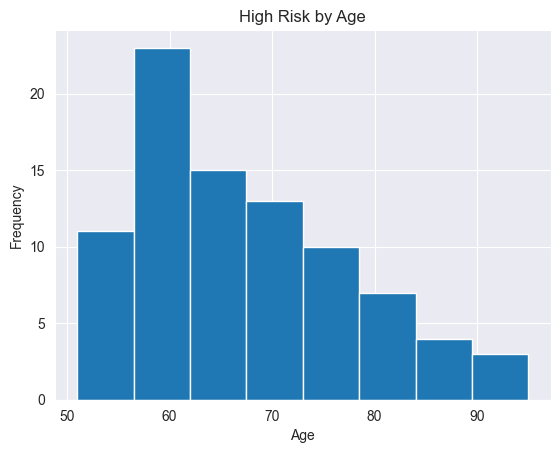

33

In [61]:
import matplotlib.pyplot as plt

high_risk = data_hw[data_hw['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("\n")
data_hw[data_hw['age'] == data_hw['age'].mode()[0]].shape[0]

**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


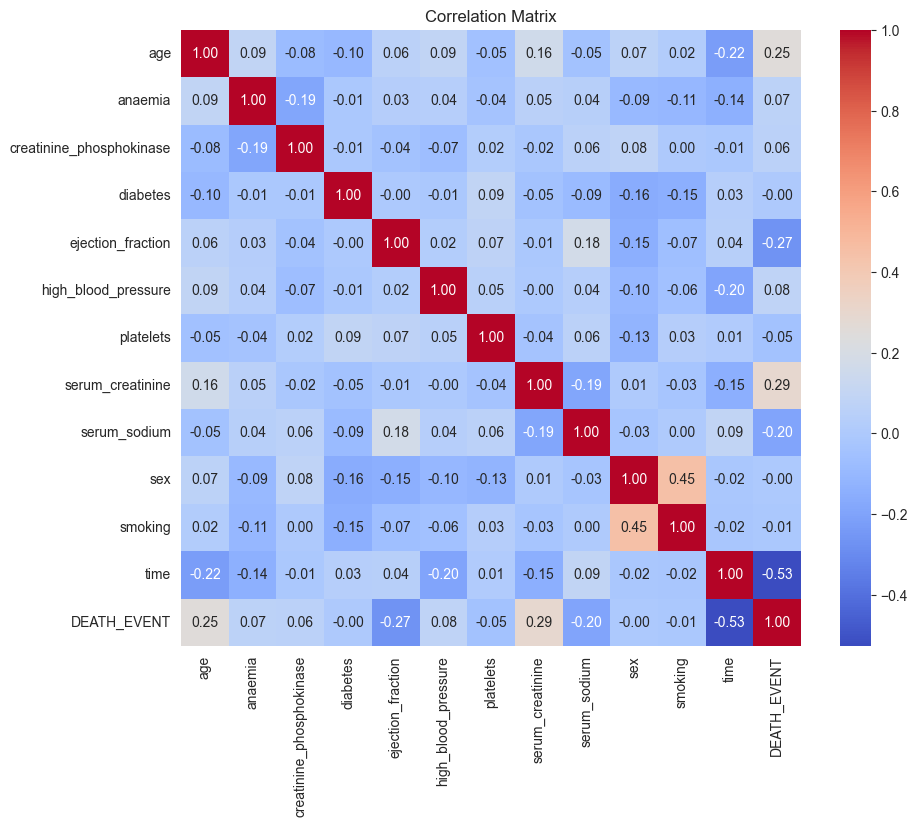

age                       age                         1.000000
creatinine_phosphokinase  creatinine_phosphokinase    1.000000
anaemia                   anaemia                     1.000000
time                      time                        1.000000
serum_creatinine          serum_creatinine            1.000000
platelets                 platelets                   1.000000
high_blood_pressure       high_blood_pressure         1.000000
ejection_fraction         ejection_fraction           1.000000
diabetes                  diabetes                    1.000000
serum_sodium              serum_sodium                1.000000
sex                       sex                         1.000000
DEATH_EVENT               DEATH_EVENT                 1.000000
smoking                   smoking                     1.000000
sex                       smoking                     0.445892
smoking                   sex                         0.445892
serum_creatinine          DEATH_EVENT                 0

In [67]:
#
corr_matrix = data_hf.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure